In [1]:
import torch
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation_easy import *
from data_preparation_hard import *
from network_func import *
from search_parameter import *
import optuna

/home/bluefog/miniconda3/envs/bf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import importlib
import data_preparation_hard

# 重新加载模块
importlib.reload(data_preparation_hard)

# 再次导入所需的内容
from data_preparation_hard import *

In [2]:
# 一、 4层神经网络训练MNIST数据集：
# 【1】异质性观察
# 图1：pulldiag在di_ring(n=5)+三种不同异质性的表现(注：现在只弄了两种异质性，均匀分布和完全异质分布。能不能弄一个稍微混合一点的数据分布？比如在完全异质分布条件下，让1，2号节点数据混合一下。）
# 图2：pullsum在di_ring(n=5)+三种不同异质性的表现
# 图3：pulldiag和pullsum都在di_ring(n=5)或者di_ring(n=10)+强异质性下的对比表现

# 【2】拓扑影响
# 图1：在row_and_col_mat(n=10, p=0.5）+强异质性条件下比较pulldiag, pullsum, frsd, frozen 
# 图2：在row_and_col_mat(n=10, p=0.2）+强异质性条件下比较pulldiag, pullsum, frsd, frozen 
# 图3：只看pullsum, 在row_and_col_mat(n=10, p=0.5），row_and_col_mat(n=10, p=0.2），di_ring(n=10)，grid_10()上的表现。

In [21]:
# 【1】异质性观察
# 图1：pulldiag在di_ring(n=5)+三种不同异质性的表现(注：现在只弄了两种异质性，均匀分布和完全异质分布。能不能弄一个稍微混合一点的数据分布？比如在完全异质分布条件下，让1，2号节点数据混合一下。

<font color=blue>四层神经网络</font>

pulldiag在di_ring(n=5)+三种不同异质性的表现

均匀分布的数据：lr_opt = <font color=red>0.074</font>

极大异质性分布的数据: lr_opt = <font color=red>0.01313</font>
 
中等异质性分布的数据: lr_opt = <font color=red>0.04965</font>

A的第二大特征值: 0.7360318786212674
A的beta: 0.8102173609241421
A的spectral gap: 0.1897826390758579
A的kappa: 2.000000000000005
S_A是: 39.898193112709926 

1.8413e+00, 2.7000e+01


Training Progress: 100%|██████████| 1000/1000 [00:56<00:00, 17.82it/s, accuracy=98.1200000000%, epoch=1000, loss=0.1110434815]


A的第二大特征值: 0.7360318786212674
A的beta: 0.8102173609241421
A的spectral gap: 0.1897826390758579
A的kappa: 2.000000000000005
S_A是: 39.898193112709926 

1.8413e+00, 2.7000e+01


Training Progress: 100%|██████████| 1000/1000 [00:58<00:00, 17.03it/s, accuracy=89.2300000000%, epoch=1000, loss=0.2237082079]


A的第二大特征值: 0.7360318786212674
A的beta: 0.8102173609241421
A的spectral gap: 0.1897826390758579
A的kappa: 2.000000000000005
S_A是: 39.898193112709926 

1.8413e+00, 2.7000e+01


Training Progress: 100%|██████████| 1000/1000 [00:28<00:00, 35.46it/s, accuracy=94.2600000000%, epoch=1000, loss=0.1855913207]


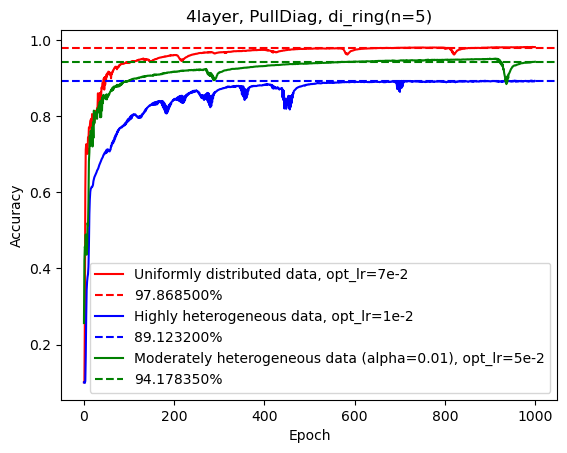

In [55]:
#均匀分布数据
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=di_ring(n=n)
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard_shuffled()

Diag_l0, Diag_a0 = train_PullDiag(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=0.074,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=False
)

#大异质性分布数据
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=di_ring(n=n)
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard()

Diag_l1, Diag_a1 = train_PullDiag(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=0.013,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=False
)

#混合分布数据 
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=di_ring(n=n)
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard_mix(alpha=0.01,seed=53)

Diag_l2, Diag_a2 = train_PullDiag(
    n=n,
    A=A,
    model_class=MNISTClassifier_2layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=0.04965,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=False
)

plt.plot(Diag_a0,color='r',label='Uniformly distributed data, opt_lr=7e-2')
number=np.mean(Diag_a0[800:])
plt.axhline(y=number, color='r', linestyle='--', label=f'{100*number:4f}%')
plt.plot(Diag_a1,color='b',label='Highly heterogeneous data, opt_lr=1e-2')
number=np.mean(Diag_a1[800:])
plt.axhline(y=number, color='b', linestyle='--', label=f'{100*number:4f}%')
plt.plot(Diag_a2,color='g',label='Moderately heterogeneous data (alpha=0.01), opt_lr=5e-2')
number=np.mean(Diag_a2[800:])
plt.axhline(y=number, color='g', linestyle='--', label=f'{100*number:4f}%')

plt.title("4layer, PullDiag, di_ring(n=5)")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# 【1】异质性观察
# 图2：pullsum在di_ring(n=5)+三种不同异质性的表现

<font color=blue>四层神经网络</font>

pullsum在di_ring(n=5)+三种不同异质性的表现

均匀分布的数据：lr_opt = <font color=red>0.05592</font>

极大异质性分布的数据: lr_opt = <font color=red>0.00727</font>
 
中等异质性分布的数据: lr_opt = <font color=red>0.04486</font>

A的第二大特征值: 0.7360318786212674
A的beta: 0.8102173609241421
A的spectral gap: 0.1897826390758579
A的kappa: 2.000000000000005
S_A是: 39.898193112709926 

1.8413e+00, 2.7000e+01


Training Progress: 100%|██████████| 1000/1000 [00:55<00:00, 18.16it/s, accuracy=98.0500000000%, epoch=1000, loss=0.1238359898]


A的第二大特征值: 0.7360318786212674
A的beta: 0.8102173609241421
A的spectral gap: 0.1897826390758579
A的kappa: 2.000000000000005
S_A是: 39.898193112709926 

1.8413e+00, 2.7000e+01


Training Progress: 100%|██████████| 1000/1000 [00:25<00:00, 39.61it/s, accuracy=86.4900000000%, epoch=1000, loss=0.2702794254]


A的第二大特征值: 0.7360318786212674
A的beta: 0.8102173609241421
A的spectral gap: 0.1897826390758579
A的kappa: 2.000000000000005
S_A是: 39.898193112709926 

1.8413e+00, 2.7000e+01


Training Progress: 100%|██████████| 1000/1000 [00:25<00:00, 38.54it/s, accuracy=95.0000000000%, epoch=1000, loss=0.1615254916]


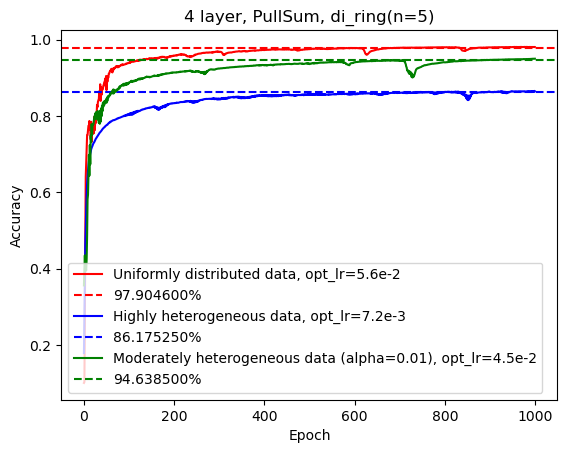

In [56]:
#均匀分布数据
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=di_ring(n=n)
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard_shuffled()

Sum_l0, Sum_a0 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=0.05593,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=False
)

#大异质性分布数据
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=di_ring(n=n)
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard()

Sum_l1, Sum_a1 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_2layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=0.007272,#0.14534766737788476,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=False
)

#混合分布数据 
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=di_ring(n=n)
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard_mix(alpha=0.01,seed=53)

Sum_l2, Sum_a2 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_2layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=0.04486,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=False
)

plt.plot(Sum_a0,color='r',label='Uniformly distributed data, opt_lr=5.6e-2')
number=np.mean(Sum_a0[800:])
plt.axhline(y=number, color='r', linestyle='--', label=f'{100*number:4f}%')
plt.plot(Sum_a1,color='b',label='Highly heterogeneous data, opt_lr=7.2e-3')
number=np.mean(Sum_a1[800:])
plt.axhline(y=number, color='b', linestyle='--', label=f'{100*number:4f}%')
plt.plot(Sum_a2,color='g',label='Moderately heterogeneous data (alpha=0.01), opt_lr=4.5e-2')
number=np.mean(Sum_a2[800:])
plt.axhline(y=number, color='g', linestyle='--', label=f'{100*number:4f}%')

plt.title("4 layer, PullSum, di_ring(n=5)")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# 一、 4层神经网络训练MNIST数据集：
# 【1】异质性观察
# 图3：pulldiag和pullsum都在di_ring(n=5)或者di_ring(n=10)+强异质性下的对比表现

<font color=blue>四层神经网络</font>

di_ring(n=5)

PullSum opt_lr = <font color=red>0.007272</font>

PullDiag opt_lr = <font color=red>0.013</font>

di_ring(n=10)

PullSum opt_lr = <font color=red>0.008147</font>

PullDiag opt_lr = <font color=red>0.001832</font>

A的第二大特征值: 0.7360318786212674
A的beta: 0.8102173609241421
A的spectral gap: 0.1897826390758579
A的kappa: 2.000000000000005
S_A是: 39.898193112709926 

1.8413e+00, 2.7000e+01


Training Progress: 100%|██████████| 1000/1000 [00:52<00:00, 19.14it/s, accuracy=86.0300000000%, epoch=1000, loss=0.5195783973]


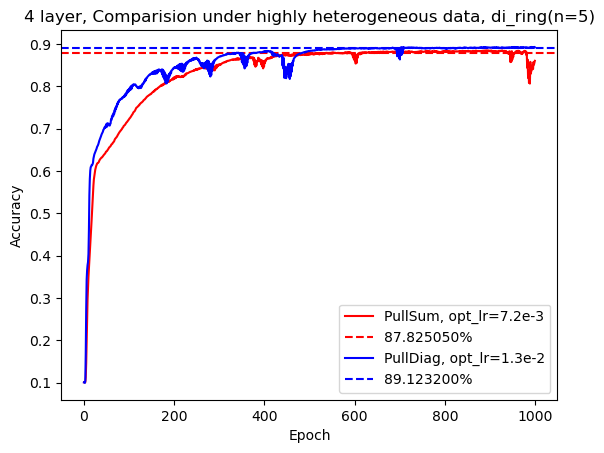

In [57]:
#大异质性分布数据
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=di_ring(n=n)
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard()

Diag_l1, Diag_a1 = train_PullDiag(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=0.013,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=False
)

Sum_l1, Sum_a1 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=0.007272,#0.14534766737788476,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=False
)

plt.plot(Sum_a1,color='r',label='PullSum, opt_lr=7.2e-3')
number=np.mean(Sum_a1[800:])
plt.axhline(y=number, color='r', linestyle='--', label=f'{100*number:4f}%')
plt.plot(Diag_a1,color='b',label='PullDiag, opt_lr=1.3e-2')
number=np.mean(Diag_a1[800:])
plt.axhline(y=number, color='b', linestyle='--', label=f'{100*number:4f}%')
plt.title("4 layer, Comparision under highly heterogeneous data, di_ring(n=5)")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

A的第二大特征值: 0.8814984307235881
A的beta: 0.9512126703474658
A的spectral gap: 0.048787329652534184
A的kappa: 2.000000000000005
S_A是: 219.49147627446277 

1.9567e+00, 6.1440e+02


Training Progress: 100%|██████████| 1000/1000 [02:52<00:00,  5.81it/s, accuracy=82.6100000000%, epoch=1000, loss=1.9927811146]


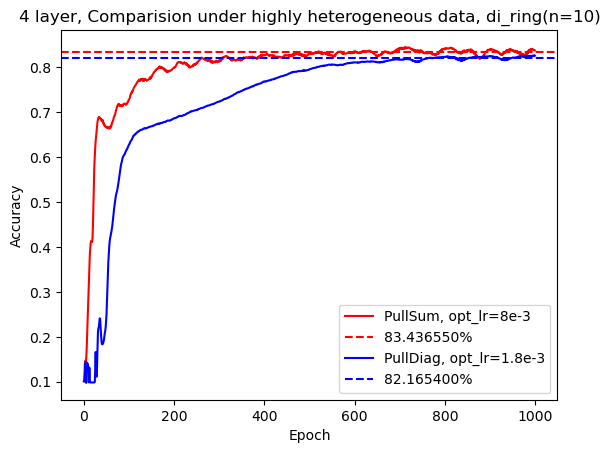

In [58]:
#大异质性分布数据
n=10
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=di_ring(n=n)
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_10_hard_linear_mix(p1=0.9,seed=49)#prepare_node_10_hard()#prepare_node_10_hard_mix(alpha=1e-2,seed=89)

Sum_ll, Sum_aa= train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=0.008147,#0.004734276782045016,#0.14534766737788476,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=False
)

Diag_ll, Diag_aa= train_PullDiag(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=0.00183,#0.004734276782045016,#0.14534766737788476,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=False
)

plt.plot(Sum_aa,color='r',label='PullSum, opt_lr=8e-3')
number=np.mean(Sum_aa[800:])
plt.axhline(y=number, color='r', linestyle='--', label=f'{100*number:4f}%')
plt.plot(Diag_aa,color='b',label='PullDiag, opt_lr=1.8e-3')
number=np.mean(Diag_aa[800:])
plt.axhline(y=number, color='b', linestyle='--', label=f'{100*number:4f}%')
plt.title("4 layer, Comparision under highly heterogeneous data, di_ring(n=10)")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#大异质性分布数据
n=10
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=di_ring(n=n)
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_10_hard_linear_mix(p1=0.9,seed=49)

search_PullDiag(
    n=n,
    A=A,
    h_data=h_data,
    y_data=y_data,
    X_test=X_test,
    y_test=y_test,
    epochs=200,
    model_class=MNISTClassifier_4layer_2,
    lr_min=0.1*0.0017450515178319597,
    lr_max=10*0.0017450515178319597,
    n_trials=10)